# Chapter 5: Linear Methods

## 5.1 Introduction

Two types of machine learning algorithms:
- **Supervised** Machine Learning
- **Unsupervised** Machine Learning

Supervised learning methods need labelled data. The parameters are learned by training the model with labeled data. 
Afterwards the model can make predictions on unseen test data.

Unsupervised approaches try to find some structure or form of trend in the training data (e.g. clustering)


## 5.2 Linear and Generalized Linear Models

Models operating in strictly linear data are called linear models.
Models using **nonlinear transformations** to map the oroginal nonlinear data to linear data are called **generalized linear models**.

## 5.3 Linear Regression

- Example for strictly linear models
- also called polynomial fitting

### 5.3.1 Defining the problem

\begin{equation}
\hat{y_i} = \sum_{j=1}^n x_{ij} * w_j  + w_0
\end{equation}

- **$\hat{y_i}$** is the predicted output 
- **$w_i$** are call weight parameters
- **$w_0$** is called bias


### 5.3.2 Solving the problem

The commonly used method to find the weigth parameters is to minimize the mean square error between the predicted values and the actual values.

$\Rightarrow$ least squares method

Optimization problem:

\begin{equation}
min\,\, {\left|| y_i - \hat{y_i} \right||}^2
\end{equation}


## 5.4 Example of linear regression


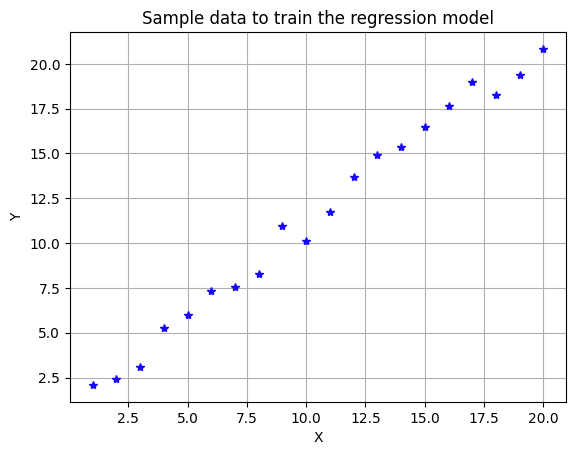

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(1, 21)).reshape(20, 1)
y = x + 2 * np.random.rand(20, 1)

plt.plot(x, y, "*", color = "#1705f9")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sample data to train the regression model")
plt.grid(True)
plt.show()

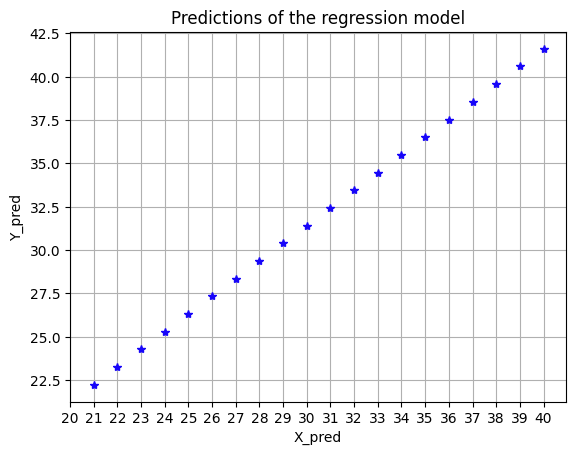

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
x_pred = np.array(range(21, 41)).reshape(20, 1)
y_pred = reg.predict(x_pred)

plt.plot(x_pred, y_pred, "*", color = "#1705f9")
plt.xlabel("X_pred")
plt.ylabel("Y_pred")
plt.title("Predictions of the regression model")
plt.xticks(np.array(range(20, 41)))
plt.grid(True)
plt.show()

## 5.5 Regularized Linear Regression

In case of overfitting the mathematical technique called regularization is used


### 5.5.1 Regularization

- adding additional constraints on the solution to avoid overfitting

$\Rightarrow$ generalizable solution

Multiple approaches are known, the two below discussed ones are sometimes referred to as *shrinkage* methods, as they try to shrinl the weight parameters close to zero.


### 5.5.2 Ridge Regression

\begin{equation}
\sum_{j=1}^{n} (w_j)^2 \le t
\end{equation}

**t**: constraint parameter


### 5.5.3 Lasso Regression

\begin{equation}
\sum_{j=1}^{n} \left| w_j \right| \le t
\end{equation}

**t**: constraint parameter

## 5.6 Generalized Linear Models (GLM)

The function to transform nonlinear relationship into linear relationship is called **basic function** or **link function**.

For example, logistic regression uses logistic function as basic function to transform the nonlinearity into linearity
-> output $\in [0,1]$

### 5.6.1 Logistic Regression

Logistic sigmoid function $\sigma (x)$

\begin{equation}
\sigma (x) = \frac{1}{1 + e^{-x}}
\end{equation}

Relationship between input ad output

\begin{equation}
\hat{y_i} = \sigma \left( \sum_{j=1}^n x_{ij} * w_j  + w_0 \right)
\end{equation}

## 5.7 K-Nearest Neighbour (KNN) Algorithm

KNN is a generic method that can be used as a classifier or regressor and it does not assume any type of relationship between input and output.

### 5.7.1 Definition of KNN

\begin{equation}
\hat{y} = \left( \sum_{i=1}^{k} y_i \right) / k
\end{equation}

$y_i$ is the output value of the *i*th nearest neighbour.
Problem: heavy memory footprint and high computation

### 5.7.2 Classification and Regression

KNN is a local method and can be applied to classification and regression problems.

## 5.9 Exercises

### Exercise 3

apply KNN module to sample data

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split


knn = KNeighborsClassifier(n_neighbors=7)
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


Accuracy:  0.7333333333333333
Precision:  0.719047619047619


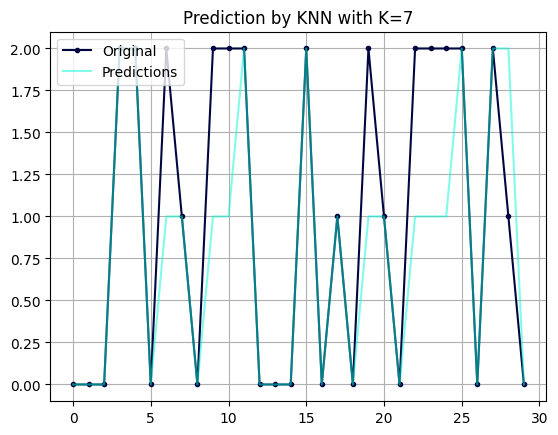

In [3]:
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
print("Accuracy: ", accuracy)
print("Precision: ", precision)

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Prediction by KNN with K=7")
ax1.plot(y_test, color = "#020640", marker = ".", label = "Original")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()

#### Cross Validation

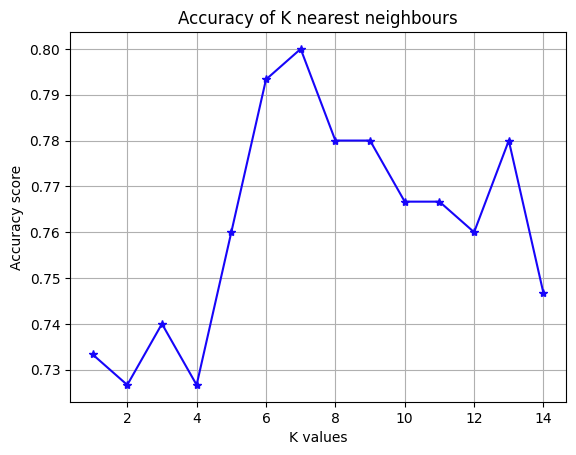

In [4]:
# Cross Validation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

k_values = [i for i in range (1,15)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

plt.plot(k_values, scores, marker='*', color = "#1705f9")
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.title("Accuracy of K nearest neighbours")
plt.grid(True)
plt.show()




### Exercise 4

Regression problem

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsClassifier(n_neighbors=7)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2)

knn_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_reg.predict(X_test_reg)

Accuracy:  0.8666666666666667
Precision:  0.8666666666666667


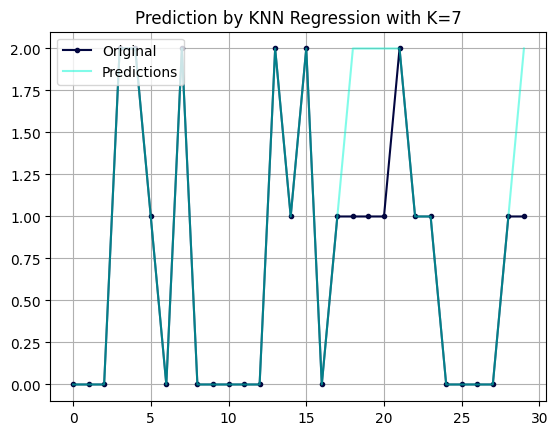

In [7]:
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

accuracy_reg = accuracy_score(y_test_reg, y_pred_reg)
precision_reg = precision_score(y_test_reg, y_pred_reg, average='macro')
print("Accuracy: ", accuracy_reg)
print("Precision: ", precision_reg)

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Prediction by KNN Regression with K=7")
ax1.plot(y_test_reg, color = "#020640", marker = ".", label = "Original")
ax1.plot(y_pred_reg, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()